In [1]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.3"

In [2]:
golf = read.csv("playgolf.csv")

In [4]:
smp_size <- floor(0.9 * nrow(golf))
set.seed(123)
train_ind <- sample(seq_len(nrow(golf)), size = smp_size)

train <- golf[train_ind, ]
test <- golf[-train_ind, ]

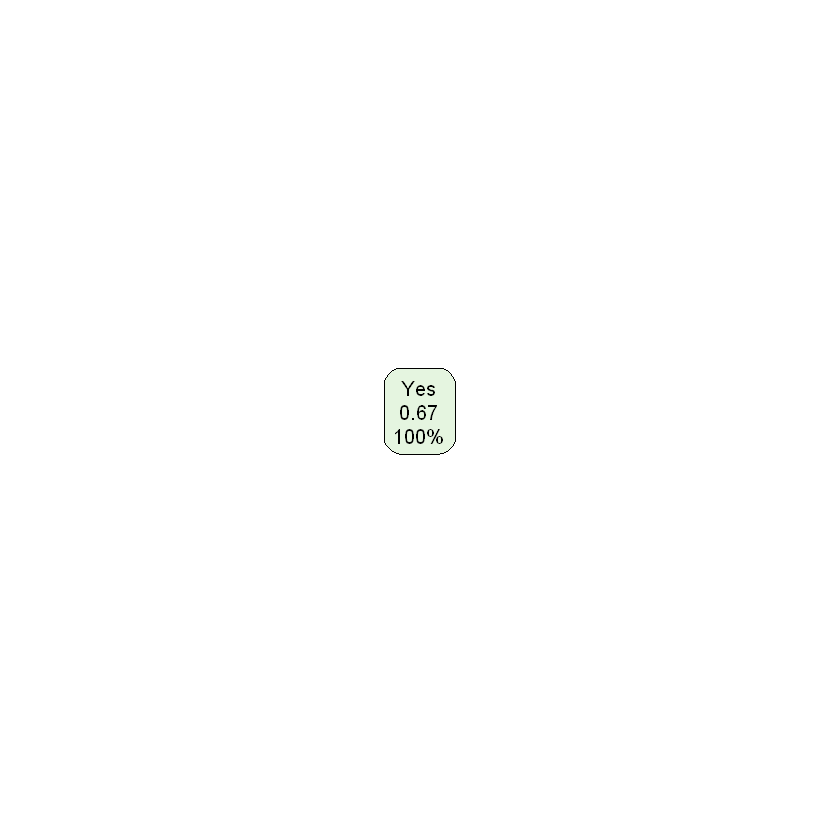

In [5]:
Myres <- rpart(Play.Golf~Outlook+Humidity+Windy, data = train)
rpart.plot(Myres, fallen.leaves = F, cex =1)